# 4. Trade Call Prediction using classification

## 4.1 Loading data with Bollinger columns.

In [1]:
# Importing necessary libraries and data.
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
PNB_df = pd.read_csv(r"D:/Datasets/PNB.csv")
PNB_df['Date'] = PNB_df['Date'].astype('datetime64')
PNB_df.set_index('Date',inplace=True)
PNB_df.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,PNB,EQ,169.15,169.95,171.30,166.2,166.85,166.80,168.94,7476618,1.263123e+09,41641,1352589,18.09
2017-05-16,PNB,EQ,166.80,167.35,178.00,164.8,173.20,174.15,173.13,51532461,8.921904e+09,254027,5804867,11.26
2017-05-17,PNB,EQ,174.15,173.00,173.10,164.3,164.80,165.05,167.27,26536944,4.438942e+09,116512,7037498,26.52
2017-05-18,PNB,EQ,165.05,163.40,164.40,157.9,158.25,158.50,161.06,13905573,2.239613e+09,76746,3245443,23.34
2017-05-19,PNB,EQ,158.50,159.50,162.25,154.1,155.20,155.20,157.59,16311602,2.570540e+09,82394,2816963,17.27


In [2]:
# Constructing Bollinger columns.
rolling_mean = PNB_df['Close Price'].rolling(window=14).mean()
rolling_std = PNB_df['Close Price'].rolling(window=14).std()
PNB_df['lower_band'] = pd.Series(rolling_mean - 2*rolling_std)
PNB_df['upper_band'] = pd.Series(rolling_mean + 2*rolling_std)
PNB_df['middle_band'] = pd.Series((PNB_df['lower_band']+PNB_df['upper_band'])/2)
PNB_df.dropna(inplace=True)
PNB_df.head()                         

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,lower_band,upper_band,middle_band
Date,,,,,,,,,,,,,,,,,
2017-06-01,PNB,EQ,150.50,151.00,152.30,149.25,151.60,151.90,150.95,9103808,1.374191e+09,39672,969143,10.65,137.344790,171.662353,154.503571
2017-06-02,PNB,EQ,151.90,153.40,154.05,150.90,153.00,153.05,152.87,7997880,1.222654e+09,37217,1520732,19.01,137.888292,169.154565,153.521429
2017-06-05,PNB,EQ,153.05,153.45,154.75,152.80,153.85,153.80,153.80,5133407,7.895295e+08,27356,928075,18.08,141.851083,162.284631,152.067857
2017-06-06,PNB,EQ,153.80,154.10,154.50,149.05,149.55,149.50,151.32,6081488,9.202377e+08,32123,1091219,17.94,143.940037,157.974249,150.957143
2017-06-07,PNB,EQ,149.50,149.50,153.00,149.25,152.65,152.35,151.17,7023536,1.061741e+09,37817,1243197,17.70,144.905425,156.130289,150.517857


### 4.1.1 Creating new column 'Call'.

In [3]:
# Defining a function to decide call.
def decide_call(x):
    if x['Close Price'] < x['lower_band']:
        return 'Buy'
    elif x['Close Price'] > x['lower_band'] and x['Close Price'] < x['middle_band']:
        return 'Hold Buy/ Liquidate Short'
    elif x['Close Price'] > x['middle_band'] and x['Close Price'] < x['upper_band']:
        return 'Hold Short/ Liquidate Buy'
    else:
        return 'Short'

In [4]:
PNB_df['Call'] = PNB_df.apply(decide_call,axis=1)
PNB_df.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,lower_band,upper_band,middle_band,Call
Date,,,,,,,,,,,,,,,,,,
2017-06-01,PNB,EQ,150.50,151.00,152.30,149.25,151.60,151.90,150.95,9103808,1.374191e+09,39672,969143,10.65,137.344790,171.662353,154.503571,Hold Buy/ Liquidate Short
2017-06-02,PNB,EQ,151.90,153.40,154.05,150.90,153.00,153.05,152.87,7997880,1.222654e+09,37217,1520732,19.01,137.888292,169.154565,153.521429,Hold Buy/ Liquidate Short
2017-06-05,PNB,EQ,153.05,153.45,154.75,152.80,153.85,153.80,153.80,5133407,7.895295e+08,27356,928075,18.08,141.851083,162.284631,152.067857,Hold Short/ Liquidate Buy
2017-06-06,PNB,EQ,153.80,154.10,154.50,149.05,149.55,149.50,151.32,6081488,9.202377e+08,32123,1091219,17.94,143.940037,157.974249,150.957143,Hold Buy/ Liquidate Short
2017-06-07,PNB,EQ,149.50,149.50,153.00,149.25,152.65,152.35,151.17,7023536,1.061741e+09,37817,1243197,17.70,144.905425,156.130289,150.517857,Hold Short/ Liquidate Buy


### 4.1.2 Training classificstion models with 3 Bollinger columns and stock price as input and 'Call' as output.

In [5]:
# Defining input and output variables.
X = PNB_df[['lower_band','middle_band','upper_band','Close Price']]
y = PNB_df['Call']

As the input variables are of similar scale there is no need of external scaling.Let's label the ouput variable.

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y).reshape(-1,1)

In [7]:
# Train-test splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=15)
print(X_train.shape)
print(X_test.shape)

(336, 4)
(145, 4)


In [8]:
# Importing libraries for different classifier models.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

In [9]:
from collections import OrderedDict
classifiers = OrderedDict([
    ("LogisticRegression",LogisticRegression(random_state=15)),
    ("DecisionTreeClassifier",DecisionTreeClassifier(max_depth=5,max_features=y.max(),random_state=15)),
    ("RandomForestClassifier",RandomForestClassifier(max_depth=5,n_estimators=100, max_features=y.max(),random_state=15)),
    ("svm",svm.SVC(random_state=15)),
    ("KNeighborsClassifier",KNeighborsClassifier(n_neighbors=y.max()))
])
classifiers

OrderedDict([('LogisticRegression',
              LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                                 intercept_scaling=1, l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=15, solver='lbfgs', tol=0.0001, verbose=0,
                                 warm_start=False)),
             ('DecisionTreeClassifier',
              DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                                     max_depth=5, max_features=3, max_leaf_nodes=None,
                                     min_impurity_decrease=0.0, min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0, presort='deprecated',
                                     random_state=15, splitter='best')),
             ('RandomFo

In [10]:
from sklearn.metrics import accuracy_score
for model,classifier in classifiers.items():
    clf = classifier.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy score of",model,"is:",accuracy_score(y_test,y_pred))

Accuracy score of LogisticRegression is: 0.9793103448275862
Accuracy score of DecisionTreeClassifier is: 0.6896551724137931
Accuracy score of RandomForestClassifier is: 0.7379310344827587
Accuracy score of svm is: 0.7103448275862069
Accuracy score of KNeighborsClassifier is: 0.8


### 4.1.3 Import another stock data and predict calls for this new data.

In [11]:
NBCC_df = pd.read_csv("D:/Datasets/NBCC.csv")
NBCC_df['Date'] = NBCC_df['Date'].astype('datetime64')
NBCC_df.set_index('Date',inplace=True)
NBCC_df.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,NBCC,EQ,194.25,194.5,198.65,194.5,198.3,197.60,196.41,514453,1.010456e+08,4624,228886,44.49
2017-05-16,NBCC,EQ,197.60,198.0,199.95,196.2,199.0,198.25,198.16,623932,1.236406e+08,10242,253139,40.57
2017-05-17,NBCC,EQ,198.25,198.6,202.95,197.0,200.6,200.35,200.41,1919273,3.846424e+08,23920,841130,43.83
2017-05-18,NBCC,EQ,200.35,197.0,199.25,193.5,193.6,194.20,196.20,786742,1.543567e+08,7908,398233,50.62
2017-05-19,NBCC,EQ,194.20,196.0,197.75,192.5,193.5,193.55,194.92,585718,1.141706e+08,6411,217995,37.22


In [12]:
rolling_mean_2 = NBCC_df['Close Price'].rolling(window=14).mean()
rolling_std_2 = NBCC_df['Close Price'].rolling(window=14).std()

NBCC_df['lower_band'] = pd.Series(rolling_mean_2 - rolling_std_2*2)
NBCC_df['upper_band'] = pd.Series(rolling_mean_2 + rolling_std_2*2)
NBCC_df['middle_band'] = pd.Series((NBCC_df['lower_band'] +NBCC_df['upper_band'])/2)

NBCC_df = NBCC_df.dropna()
NBCC_df.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,lower_band,upper_band,middle_band
Date,,,,,,,,,,,,,,,,,
2017-06-01,NBCC,EQ,194.95,193.00,194.90,190.50,193.35,193.45,193.25,475100,91811932.7,4522,146890,30.92,180.523545,204.590741,192.557143
2017-06-02,NBCC,EQ,193.45,195.25,198.50,194.30,195.40,195.65,196.36,1119595,219839439.3,10661,316308,28.25,180.592356,204.243358,192.417857
2017-06-05,NBCC,EQ,195.65,195.00,203.80,195.00,203.50,201.15,199.59,2218936,442880404.6,16283,1156154,52.10,180.269699,204.980301,192.625000
2017-06-06,NBCC,EQ,201.15,206.50,208.55,201.25,202.20,202.25,204.71,3198706,654797232.9,27653,877174,27.42,180.004649,205.516779,192.760714
2017-06-07,NBCC,EQ,202.25,202.50,203.45,199.85,201.30,200.90,201.23,717153,144313347.4,7457,258410,36.03,179.767938,206.710633,193.239286


In [13]:
inputs = NBCC_df[['lower_band','upper_band','middle_band','Close Price']]
NBCC_df['Calls'] = classifiers['LogisticRegression'].predict(inputs)
NBCC_df.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,lower_band,upper_band,middle_band,Calls
Date,,,,,,,,,,,,,,,,,,
2017-06-01,NBCC,EQ,194.95,193.00,194.90,190.50,193.35,193.45,193.25,475100,91811932.7,4522,146890,30.92,180.523545,204.590741,192.557143,2
2017-06-02,NBCC,EQ,193.45,195.25,198.50,194.30,195.40,195.65,196.36,1119595,219839439.3,10661,316308,28.25,180.592356,204.243358,192.417857,2
2017-06-05,NBCC,EQ,195.65,195.00,203.80,195.00,203.50,201.15,199.59,2218936,442880404.6,16283,1156154,52.10,180.269699,204.980301,192.625000,3
2017-06-06,NBCC,EQ,201.15,206.50,208.55,201.25,202.20,202.25,204.71,3198706,654797232.9,27653,877174,27.42,180.004649,205.516779,192.760714,3
2017-06-07,NBCC,EQ,202.25,202.50,203.45,199.85,201.30,200.90,201.23,717153,144313347.4,7457,258410,36.03,179.767938,206.710633,193.239286,2


## 4.2 Using Random Forest Classifier on new data.

### 4.2.1 Import new stock data.

In [14]:
BERGEPAINT_df = pd.read_csv("D:/Datasets/BERGEPAINT.csv")
BERGEPAINT_df['Date'] = BERGEPAINT_df['Date'].astype('datetime64')
BERGEPAINT_df.set_index('Date',inplace=True)
BERGEPAINT_df.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,BERGEPAINT,EQ,256.35,258.50,263.15,258.30,260.25,259.5,260.44,693178,1.805283e+08,11114,351310,50.68
2017-05-16,BERGEPAINT,EQ,259.50,261.25,262.35,258.25,261.20,261.5,260.38,455581,1.186226e+08,13715,243949,53.55
2017-05-17,BERGEPAINT,EQ,261.50,261.20,263.95,259.00,261.10,260.9,261.91,325496,8.525104e+07,6697,95378,29.30
2017-05-18,BERGEPAINT,EQ,260.90,258.90,259.20,253.00,253.05,254.1,256.31,361411,9.263385e+07,5965,137486,38.04
2017-05-19,BERGEPAINT,EQ,254.10,254.85,255.95,241.60,248.15,247.8,249.47,479054,1.195099e+08,9143,150223,31.36


### 4.2.2 Define 4 new columns , whose values are:

- % change between Open and Close price for the day
- % change between Low and High price for the day
- 5 day rolling mean of the day to day % change in Close Price
- 5 day rolling std of the day to day % change in Close Price

In [15]:
BERGEPAINT_df['%_change_Open_Close'] = (BERGEPAINT_df['Close Price'] - BERGEPAINT_df['Open Price'])/BERGEPAINT_df['Open Price'] 
BERGEPAINT_df['%_change_Low_High'] = (BERGEPAINT_df['High Price'] - BERGEPAINT_df['Low Price'])/BERGEPAINT_df['Low Price']
 
pct_change = BERGEPAINT_df['Close Price'].pct_change()

BERGEPAINT_df['5_day_RM_%_change'] = pct_change.rolling(window=5).mean()
BERGEPAINT_df['5_day_RSTD_%_change'] = pct_change.rolling(window=5).std()

BERGEPAINT_df = BERGEPAINT_df.dropna()
BERGEPAINT_df.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,%_change_Open_Close,%_change_Low_High,5_day_RM_%_change,5_day_RSTD_%_change
Date,,,,,,,,,,,,,,,,,,
2017-05-22,BERGEPAINT,EQ,247.80,251.05,251.05,244.50,249.95,249.15,247.42,260390,6.442506e+07,5812,94671,36.36,-0.007568,0.026789,-0.007999,0.016343
2017-05-23,BERGEPAINT,EQ,249.15,250.90,250.90,236.95,243.00,244.10,243.58,719976,1.753712e+08,15117,355647,49.40,-0.027102,0.058873,-0.013594,0.014281
2017-05-24,BERGEPAINT,EQ,244.10,243.00,244.10,235.10,241.80,242.45,240.34,481018,1.156081e+08,12865,251716,52.33,-0.002263,0.038282,-0.014488,0.013517
2017-05-25,BERGEPAINT,EQ,242.45,242.50,245.30,238.90,242.80,242.65,242.36,594837,1.441642e+08,15713,321453,54.04,0.000619,0.026789,-0.009110,0.013102
2017-05-26,BERGEPAINT,EQ,242.65,242.95,261.00,242.70,259.90,258.00,256.65,1166089,2.992804e+08,17147,331553,28.43,0.061947,0.075402,0.008501,0.032122


### 4.2.3 Create a new column 'Action' whose values are:

- 1 if next day's price(Close) is greater than present day's.
- (-1) if next day's price(Close) is less than present day's.
- i.e. Action [ i ] = 1 if Close[ i+1 ] > Close[ i ]
- i.e. Action [ i ] = (-1) if Close[ i+1 ] < Close[ i ]

In [16]:
BERGEPAINT_df['Action'] = np.where(BERGEPAINT_df['Close Price'].shift(-1) > BERGEPAINT_df['Close Price'],1,-1)
BERGEPAINT_df.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,%_change_Open_Close,%_change_Low_High,5_day_RM_%_change,5_day_RSTD_%_change,Action
Date,,,,,,,,,,,,,,,,,,,
2017-05-22,BERGEPAINT,EQ,247.80,251.05,251.05,244.50,249.95,249.15,247.42,260390,6.442506e+07,5812,94671,36.36,-0.007568,0.026789,-0.007999,0.016343,-1
2017-05-23,BERGEPAINT,EQ,249.15,250.90,250.90,236.95,243.00,244.10,243.58,719976,1.753712e+08,15117,355647,49.40,-0.027102,0.058873,-0.013594,0.014281,-1
2017-05-24,BERGEPAINT,EQ,244.10,243.00,244.10,235.10,241.80,242.45,240.34,481018,1.156081e+08,12865,251716,52.33,-0.002263,0.038282,-0.014488,0.013517,1
2017-05-25,BERGEPAINT,EQ,242.45,242.50,245.30,238.90,242.80,242.65,242.36,594837,1.441642e+08,15713,321453,54.04,0.000619,0.026789,-0.009110,0.013102,1
2017-05-26,BERGEPAINT,EQ,242.65,242.95,261.00,242.70,259.90,258.00,256.65,1166089,2.992804e+08,17147,331553,28.43,0.061947,0.075402,0.008501,0.032122,-1


### 4.2.4 Construct Classification model with 4 new inputs and 'Action' as target.

In [17]:
X1 = BERGEPAINT_df[['%_change_Open_Close','%_change_Low_High','5_day_RM_%_change','5_day_RSTD_%_change']]
y1 = BERGEPAINT_df['Action']

X_train, X_test, y_train, y_test = train_test_split(X1, y1,test_size=0.3,random_state=15)
rfc = RandomForestClassifier(max_depth=5,n_estimators=10,max_features=2,random_state=15)
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)
print("Accuracy score:",accuracy_score(y_test,predictions))

Accuracy score: 0.54421768707483


### 4.2.5 Plotting net cummulative returns( in %)

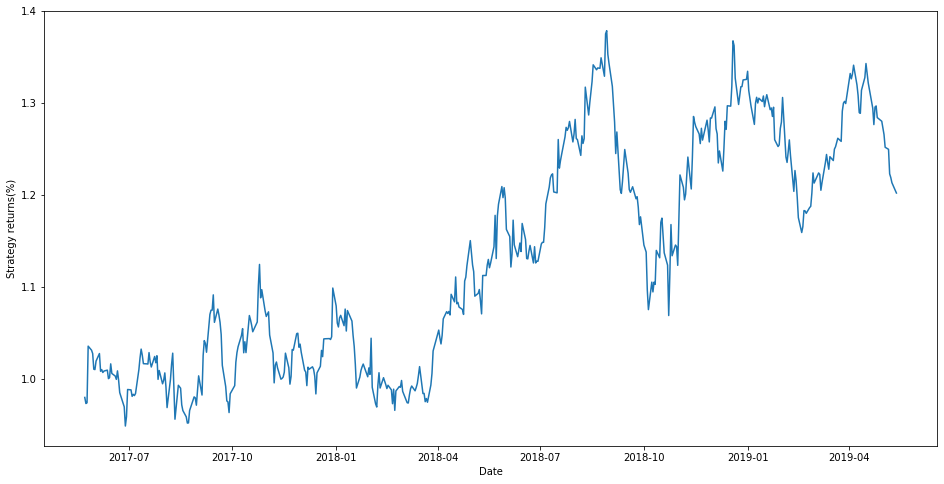

In [18]:
cummulative_returns = ( 1 + (BERGEPAINT_df['Close Price'].pct_change())).cumprod()
plt.figure(figsize=(16,8))
sns.lineplot(BERGEPAINT_df.index,cummulative_returns)
plt.ylabel("Strategy returns(%)")
plt.show()